In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

In [4]:
#Dati

F = [100, 500, 1000, 1500, 2500, 2800, 3000, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3500, 4000, 5000, 10000, 50000, 100000, 300000] #Hz
R = 99.93 #Ohm
C = 225.7 * 10**(-9) #F
L = 10.08 * 10**(-3) #H

F0_att = 1/(math.sqrt(L*C)*2*math.pi)
print("F0 atteso vale {} Hz".format(F0_att))

3336.753203172464


In [67]:
#Attenuazione

Vin = [5.22, 5.17, 5.14, 4.94, 4.64, 3.84, 3.73, 3.68, 3.68, 3.68, 3.68, 3.62, 3.68, 3.67, 3.68, 3.89, 4.47, 5.05, 5.12, 5.12, 5.14] #Volt
errVin = [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]  #Volt

Vout = [76.8 * 10**(-3), 376 * 10**(-3), 784 * 10**(-3), 1.24, 1.83, 2.67, 2.76, 2.81, 2.83, 2.85, 2.87, 2.82, 2.84, 2.82, 2.78, 2.55, 2.04, 0.871, 0.164, 0.0797, 0.01406] #Volt
errVout = [0.04 * 10**(-3), 0.001, 2 * 10**(-3), 0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.02, 0.01, 0.02, 0.02, 0.05, 0.01, 0.005, 0.008, 0.0007, 0.00002] #Volt

l=len(Vin)

A = [Vout[i]/Vin[i] for i in range(l)]
errA = [A[i]*np.sqrt((errVin[i]/Vin[i])**2+(errVout[i]/Vout[i])**2) for i in range(l)]

#fase

phi = [180-92, 180-97, 180-104, 180-112, 180-122, 180-155, 180-166, 180-171, 180-173, 180-177, 0, -2, -5, -8, 166-180, 146-180, 125-180, 102-180, 93-180, 92-180, 92-180] #gradi
errphi = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] #gradi
phi_rad = np.array(phi)/180 * np.pi
errphi_rad = np.array(errphi)/180 * np.pi

print(A)

[0.014712643678160919, 0.07272727272727272, 0.15252918287937745, 0.25101214574898784, 0.39439655172413796, 0.6953125, 0.7399463806970509, 0.7635869565217391, 0.7690217391304348, 0.7744565217391304, 0.779891304347826, 0.7790055248618784, 0.7717391304347825, 0.7683923705722071, 0.7554347826086956, 0.6555269922879177, 0.4563758389261745, 0.1724752475247525, 0.03203125, 0.015566406249999998, 0.0027354085603112843]


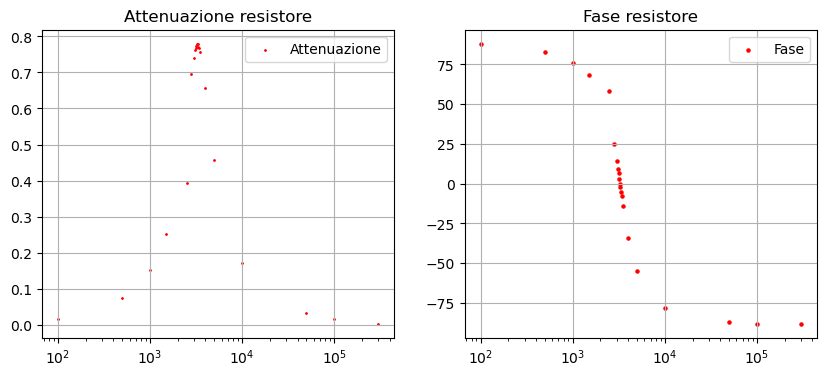

In [6]:
"""Grafici"""

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#attenuazione
axes[0].scatter(F, A, label='Attenuazione', color='red', s = 1)
axes[0].set_title('Attenuazione resistore')
axes[0].legend()
axes[0].set_xscale('log')
axes[0].grid(True)

#fase
axes[1].scatter(F, phi, label='Fase', color='red', s = 5)
axes[1].set_title('Fase resistore')
axes[1].legend()
axes[1].set_xscale('log')
axes[1].grid(True)

In [10]:
#Fit Attenuazione
def Att(F, R0, C0, L0):
    return (R0/(np.sqrt(R0**2+((L0*2*np.pi*F)-(1/(2*F*np.pi*C0)))**2)))
least_squares = LeastSquares(F, A, errA, Att)
m = Minuit(least_squares, R0 = R, C0 = C, L0 = L)
m.migrad()
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.205e+04 (χ²/ndof = 669.6)│             Nfcn = 2302              │
│ EDM = 9.58e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R0   │    84     │     5     │     -5     │     5      │         │         │       │
│ 1 │ C0   │ 0.187e-6  │ 0.010e-6  │ -0.010e-6  │  0.010e-6  │         │         │       │
│ 2 │ L0   │  11.0e-3  │  0.6e-3   │  -0.6e-3   │   0.6e-3   │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          R0           │          C0           │          L0           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │    -5     │     5     │ -0.01e-6  │  0.01e-6  │  -0.6e-3  │  0.6e-3   │
│  Valid   │   False   │   False   │   False   │   False   │   False   │   False   │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────────────────────────────────────────┐
│    │              R0              C0              L0 │
├────┼─────────────────────────────────────────────────┤
│ R0 │            20.7 -45.78466589e-9      2.69638e-3 │
│ C0 │ -45.78466589e-9        1.02e-16    -5.96768e-12 │
│ L0 │      2.69638e-3    -5.96768e-12        3.52e-07 │
└────┴─────────────────────────────────────────────────┘

In [61]:
#Fit Sfase
def phic(F, R0, C0, L0):
    w = 2 * np.pi * F
    return -np.arctan(((L0*w)-(1/(C0*w)))/R0)
n = 21
least_squares1 = LeastSquares(F[:n], phi_rad[:n], errphi_rad[:n], phic)
m1 = Minuit(least_squares1, R0 = R, C0 = C, L0 = L)
m1.migrad()
m1.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 270.8 (χ²/ndof = 15.0)     │             Nfcn = 6950              │
│ EDM = 3.57e-06 (Goal: 0.0002)    │            time = 0.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R0   │    120    │    60     │    -60     │     60     │         │         │       │
│ 1 │ C0   │  0.23e-6  │  0.12e-6  │  -0.12e-6  │  0.12e-6   │         │         │       │
│ 2 │ L0   │   0.010   │   0.005   │   -0.005   │   0.005    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │          R0           │          C0           │          L0           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │    -60    │    60     │ -0.12e-6  │  0.12e-6  │  -0.005   │   0.005   │
│  Valid   │   False   │   False   │   False   │   False   │   False   │   False   │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬─────────────────────────────────────────────────┐
│    │              R0              C0              L0 │
├────┼─────────────────────────────────────────────────┤
│ R0 │        3.81e+03 -7.436575262e-6      330.808e-3 │
│ C0 │ -7.436575262e-6        1.45e-14    -646.313e-12 │
│ L0 │      330.808e-3    -646.313e-12        2.88e-05 │
└────┴─────────────────────────────────────────────────┘

Text(0, 0.5, 'Attenuazione')

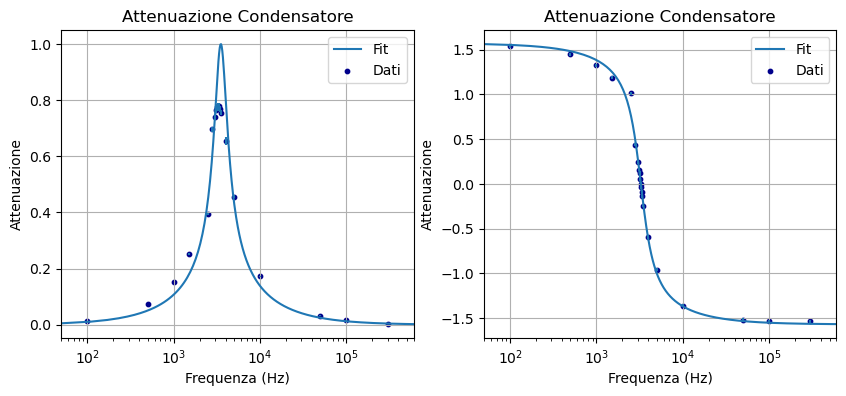

In [115]:
"""Grafico con fit"""

figg, axess = plt.subplots(1, 2, figsize=(10, 4))

R0a, C0a, L0a = m.values[0], m.values[1], m.values[2]
sigmaRa, sigmaCa, sigmaLa = m.errors[0], m.errors[1], m.errors[2]

R0f, C0f, L0f =  m1.values[0], m1.values[1], m1.values[2]
sigmaRf, sigmaCf, sigmaLf = m1.errors[0], m1.errors[1], m1.errors[2]

x = np.linspace(min(F)/2,max(F)*2,10000)

#attenuazione
axess[0].plot(x,Att(x,R0a, C0a, L0a), label = 'Fit')
axess[0].scatter(F, A, label='Dati', color='darkblue', s = 10)
axess[0].set_title('Attenuazione Condensatore')
axess[0].legend()
axess[0].set_xscale('log')
axess[0].grid(True)
axess[0].errorbar(F, A, yerr=errA, fmt = 'none')
axess[0].set_xlim(min(F)/2,max(F)*2)
axess[0].set_xlabel("Frequenza (Hz)")
axess[0].set_ylabel("Attenuazione")

#fase
axess[1].plot(x,phic(x,R0f, C0f, L0f), label = 'Fit')
axess[1].scatter(F, phi_rad, label='Dati', color='darkblue', s = 10)
axess[1].set_title('Attenuazione Condensatore')
axess[1].legend()
axess[1].set_xscale('log')
axess[1].grid(True)
axess[1].errorbar(F, phi_rad, yerr=errphi_rad, fmt = 'none')
axess[1].set_xlim(min(F)/2,max(F)*2)
axess[1].set_xlabel("Frequenza (Hz)")
axess[1].set_ylabel("Attenuazione")



In [127]:
print(R0a, C0a, L0a)
print(sigmaRa, sigmaCa, sigmaLa)

print(R0f, C0f, L0f)
print(sigmaRf, sigmaCf, sigmaLf)

84.38282066423577 1.869993206792606e-07 0.011006598973777893
4.555004313918253 1.0080158013704079e-08 0.0005933286612241763
118.29179913901567 2.310886247361585e-07 0.01027966966796565
61.72344444984686 1.205366698565014e-07 0.005362056342375168


In [145]:
# F0 di fit dall'attenuazione

w0_a = np.sqrt((1/(L0a*C0a)) - (R0a**2/(2*L0a**2)))
F0_a  = w0_a / (2*np.pi)

dw_dR = - R0a / (2 * L0a**2 * w0_fit)
dw_dL = (-L0a + R0a**2 * C0a) / (2 * w0_fit * L0a**3 * C0a)
dw_dC = -1 / (2 * L0a * C0a**2 * w0_fit)
sigma_w0a = np.sqrt((dw_dR * sigmaRa)**2 + (dw_dL * sigmaLa)**2 + (dw_dC * sigmaCa)**2)
sigma_F0a = sigma_w0a / (2*np.pi)

print("Frequenza caratteristica: ", F0_a, "+/-", sigma_F0a, "Hz")

# Fattore di qualità dall'attenuazione

Q = (1 / R0a) * (1 / np.sqrt(L0a * C0a))

dQ_dR = - Q / R0a
dQ_dL = - Q / (2 * L0a)
dQ_dC = - Q / (2 * C0a)
sigma_Q = np.sqrt((dQ_dR * sigmaRa)**2 + (dQ_dL * sigmaLa)**2 + (dQ_dC * sigmaCa)**2)

print("Fattore di qualità: ",  Q, "+/-", sigma_Q)




Frequenza caratteristica:  3400.3596063243076 +/- 130.4163822948934 Hz
Fattore di qualità:  261.21575983003873 +/- 17.261555991009914


In [141]:
# F0 di fit dalla fase

w0_phase = 1 / np.sqrt(L0f * C0f)
f0_phase = w0_phase / (2 * np.pi)

dw_dL = - w0_phase / (2 * L0f)                
dw_dC = - w0_phase / (2 * C0f)                 

sigma_w0 = np.sqrt((dw_dR * sigmaRf)**2 + (dw_dL * sigmaLf)**2 + (dw_dC * sigmaCf)**2)
sigma_f0 = sigma_w0 / (2 * np.pi)

print("Frequenza caratteristica: ", F0_a, "+/-", sigma_F0a, "Hz")

# Fattore di qualità dall'attenuazione

Q = (1 / R0f) * (1 / np.sqrt(L0f * C0f))

dQ_dR = - Q / R0f
dQ_dL = - Q / (2 * L0f)
dQ_dC = - Q / (2 * C0f)
sigma_Q = np.sqrt((dQ_dR * sigmaRf)**2 + (dQ_dL * sigmaLf)**2 + (dQ_dC * sigmaCf)**2)

print("Fattore di qualità: ",  Q, "+/-", sigma_Q)

Frequenza caratteristica:  3400.3596063243076 +/- 130.4163822948934 Hz
Fattore di qualità:  173.44688289172808 +/- 110.83015919190503
